# Unconstrained minimization algorithms

Consider the following quadratic unconstrained problem

$$
\begin{array}{lll}
\textrm{minimize}   & f(x) = \frac{1}{2}x^{T}Ax + b^{T}x + c & \\
\end{array}
$$

where $A$ is a symmetric $n \times n$ matrix, $x,b \in \mathbb{R}^{n}$, and $c \in \mathbb{R}$.

$f$ is a $C^{\infty}$-function with

$$
\nabla f(x) = Ax + b \quad\text{and}\quad \nabla^{2} f(x) = A.
$$



- $f$ is convex $\iff A \succeq 0$ (positive semi-definite).
  - **Local minima are global for convex functions!**
- $f$ is strict convex $\iff A \succ 0$ (positive definite).
  - $A$ invertible and $x^{*} = -A^{-1}b$ is the **unique global minimum**.
- $A \nsucceq 0 \implies f$ has no local minima.

## Gradient methods

The general idea of gradient methods is
to find the minimum of an optimization problem of the form

$$
\begin{array}{lll}
\textrm{minimize} & f(x), & \\
\end{array}
$$

with $x \in \mathbb{R}^{n}$ and $f \in C^{1}(\mathbb{R}^{n},\mathbb{R})$.

Many common solution strategies try to find the minimum step-wise.
From a **starting point** $x^{0} \in \mathbb{R}^{n}$
in each step $k = 0, 1, \ldots$ those strategies determine

1. a **descent direction** $d^{k} \in \mathbb{R}^{n}$ and
2. a positive bounded **step size** $0 < \alpha^{k} < \delta$,
   with $\alpha^{k}, \delta \in \mathbb{R}$,

such that the objective function value at a new point

$$
x^{k + 1} = x^{k} + \alpha^{k} d^{k}, \quad k = 0, 1, \ldots
$$

is smaller than the previous one $f(x^{k + 1}) < f(x^{k})$.

A vector $d^{k} \in \mathbb{R}^{n}$ is called **descent direction**
in a point $x^{k} \in \mathbb{R}^{n}$,
if there exists a $\delta > 0$ such that for all
$0 < \alpha^{k} < \delta$ the inequality

$$
f(x^{k} + \alpha^{k} d^{k}) < f(x^{k})
$$

holds.

The following figure sketches
$\Phi(\alpha^{k}) = f(x^{k} + \alpha^{k} d^{k})$,
that is the objective function value
as function of the step size $\alpha^{k}$
for a given descent direction $d^{k}$ at a given point $x^{k}$.

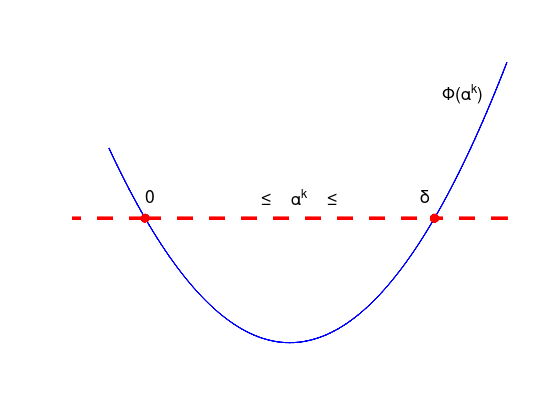

In [1]:
alpha = linspace (-0.5, 5, 100);
phi = (alpha - 2).^2 + 2;
plot (alpha, phi, 'LineWidth', 2, 'b');
hold on;
plot ([-2, 0, 4, 6], [6, 6, 6, 6], 'LineWidth', 4, 'ro--');
xlim ([-1, 5]);
ylim ([ 1, 12]);
axis off;
tprops = {'FontSize', 18};
text (0.0, 6.7, '0', tprops{:});
text (1.6, 6.7, '\leq     \alpha^{k}     \leq', tprops{:});
text (3.8, 6.7, '\delta', tprops{:});
text (4.1, 10, '\Phi(\alpha^{k})', tprops{:});

According to **Taylor's theorem**,
close to a point $x^{k} \in \mathbb{R}^{n}$
a function $f \in C^{1}(\mathbb{R}^{n},\mathbb{R})$
can be locally approximated by a linear function

$$
\tilde{f}(x^{k} + \alpha^{k} d^{k}) := f(x^{k}) + \nabla f(x^{k})^{T}(\alpha^{k} d^{k})
$$

or if $f \in C^{2}(\mathbb{R}^{n},\mathbb{R})$ by a quadratic function

$$
\tilde{f}(x^{k} + \alpha^{k} d^{k}) := f(x^{k}) + \nabla f(x^{k})^{T}(\alpha^{k} d^{k})
  + \frac{1}{2}(\alpha^{k} d^{k})^{T}\nabla^{2} f(x^{k})(\alpha^{k} d^{k}).
$$

:::{admonition} **Theorem 5:** Decent direction
:class: tip

If $\nabla f(x^{k})^{T}d^{k} < 0$ holds, then $d^{k}$ is a decent direction of $f$ in the point $x^{k}$.

:::

:::{dropdown} *Proof:*

For the $C^{1}$-function $\Phi(\alpha^{k}) := \tilde{f}(x^{k} + \alpha^{k} d^{k})$
there is $\Phi'(0) = \nabla f(x^{k})^{T} d^{k}$ < 0.
From this follows the assertion.

$$\tag*{$\Box$}$$

:::

:::{note}

The most obvious choice for such a decent direction
is $d^{k} := -\nabla f(x^{k})$.
The repetitive application of this method is called
**gradient descent** or **steepest decent**.

$$
x^{k + 1} = x^{k} - \alpha^{k} \nabla f(x^{k}), \quad k = 0, 1, \ldots
$$

:::

## What can go wrong?

Consider the function $f(x) = x^2$,
the descent directions $d^{k} = (-1)^{k + 1}$,
the step sizes $\alpha^{k} = 2 + \frac{3}{2^{k + 1}}$
and a starting point $x_{0} = 2$.

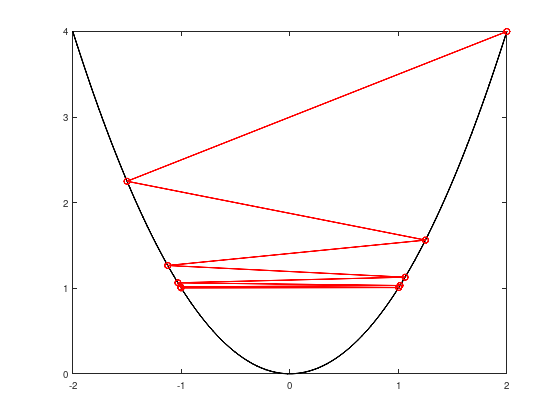

In [17]:
f = @(x) x.^2;
x = linspace (-2, 2, 100);
plot (x, f(x), 'k', 'LineWidth', 2);
hold on;

alpha = @(k) 2 + 3 / 2^(k + 1);

N = 10;
x = zeros (1, N);
x(1) = 2;
for k = 1:(N - 1)
  x(k + 1) = x(k) + alpha(k - 1) * (-1)^(k);
end

plot (x, f(x), 'ro-', 'LineWidth', 2);

**Step size too large:** convergence against pair $\pm 1$.

Consider the function $f(x) = x^2$,
the descent directions $d^{k} = -1$,
the step sizes $\alpha^{k} = \frac{1}{2^{k + 1}}$
and a starting point $x_{0} = 2$.

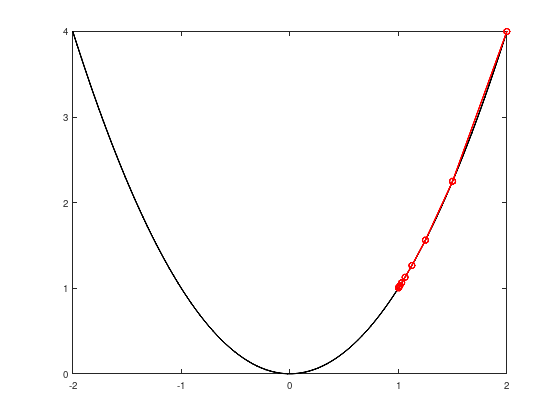

In [16]:
f = @(x) x.^2;
x = linspace (-2, 2, 100);
plot (x, f(x), 'k', 'LineWidth', 2);
hold on;

alpha = @(k) 1 / 2^(k + 1);

N = 10;
x = zeros (1, N);
x(1) = 2;
for k = 1:(N - 1)
  x(k + 1) = x(k) + alpha(k - 1) * (-1);
end

plot (x, f(x), 'ro-', 'LineWidth', 2);

**Step size too short.**

## Choices of step size

Equipped with an idea how to determine a **descent direction**,
the remaining missing parameter
for the **gradient descent method**
is the **step size** $\alpha^{k}$.

One classical method to choose the step size
is the **Armijo rule**.
This method is in general not efficient,
but illustrates key ideas
about other step size determination methods.

A possible Matlab/Octave implementation of the Armijo rule
is given in the following listing.
To improve readability,
the step index $k$ has been omitted.

To evaluate the function,
a $C^{1}$-function $f$,
a current point $x := x^{k}$
with its first derivate $\texttt{dfx} := \nabla f(x^{k})$
and a descent direction $d := d^{k}$ are given.

Furthermore,
three parameters are defined in the function:
a start value for $\alpha^{k} =: \texttt{alpha}$,
$\texttt{beta} := \beta$ with $0 < \beta < 1$,
and a shrink factor $\texttt{tau} := \tau$ with $0 < \tau < 1$.

In [22]:
function alpha = armijo_rule (f, x, dfx, d)
  alpha = 1;    % initial value
  beta  = 0.1;
  tau   = 0.5;  % shrink factor
  fx    = f(x);
  while (f(x + alpha * d) > fx + alpha * beta * (dfx' * d))
    alpha = tau * alpha;  % shrink alpha
  end
end

An illustration of the algorithm is given in the following Figure.

Starting with some value for $\alpha^{k}$,
the value is shrinked by $\tau$
until the objective function value
$f(x^{k} + alpha^{k} * d^{k})$
is below the red line, depending on $\beta$.

This ensures a decreasind objective function value.
However,
a bad choice of the parameters might slow the convergence down.

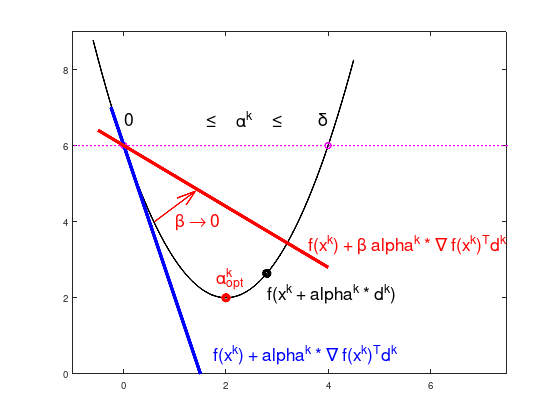

In [3]:
alpha = linspace (-0.6, 4.5, 100);
phi = (alpha - 2).^2 + 2;
plot (alpha, phi, 'LineWidth', 2, 'k');
hold on;
plot ([-2, 0, 4, 9], [6, 6, 6, 6], 'LineWidth', 2, 'mo:');
alpha = linspace (-0.25, 1.5, 10);
plot (alpha,        -4 * alpha + 6, 'LineWidth', 4, 'b-');
beta = 0.2;
alpha = linspace (-0.5, 4, 10);
plot (alpha, beta * -4 * alpha + 6, 'LineWidth', 4, 'r-');
plot (2, 2, 'LineWidth', 4, 'ro');
plot (2.8, 0.8^2 + 2, 'LineWidth', 4, 'ko');
xlim ([-1, 7.5]);
ylim ([ 0, 9]);
%axis off;
tprops = {'FontSize', 18};
text (0.0, 6.7, '0', tprops{:});
text (1.6, 6.7, '\leq     \alpha^{k}     \leq', tprops{:});
text (3.8, 6.7, '\delta', tprops{:});
text (2.8, 2.1, 'f(x^{k} + alpha^{k} * d^{k})', tprops{:});
text (3.6, 3.4, 'f(x^{k}) + \beta alpha^{k} * \nabla f(x^{k})^{T}d^{k}', ...
      tprops{:}, 'Color', 'red');
text (1.75, 0.5, 'f(x^{k}) + alpha^{k} * \nabla f(x^{k})^{T}d^{k}', ...
      tprops{:}, 'Color', 'blue');
text (1.8, 2.5, '\alpha^{k}_{opt}', tprops{:}, 'Color', 'red');
quiver (0.6, 4, 0.8, 0.8, 'LineWidth', 2, 'r');
text (1, 4, '\beta \rightarrow 0', tprops{:}, 'Color', 'red');

In the optimization literature,
there are depending on the particular problem
better algorithms for choosing the step size available.

### Example: gradient descent zig-zagging

Consider the function $f(x,y) = \frac{1}{2}(x^2 + M y^2)$,
and its gradient $\nabla f(x,y) = (x, My)^{T}$.

The step sizes $\alpha^{k}$ are determined by the **Armijo rule**
and the starting point is $x_{0} = (M, 1)^{T}$.

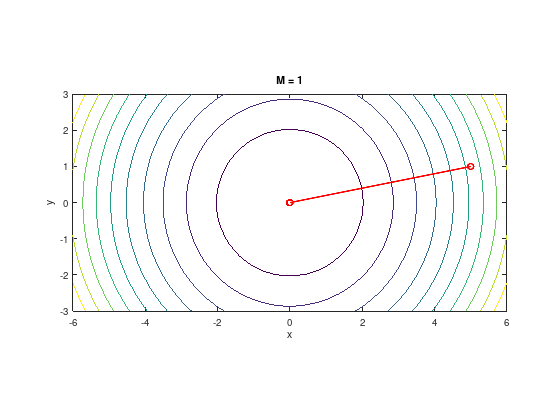

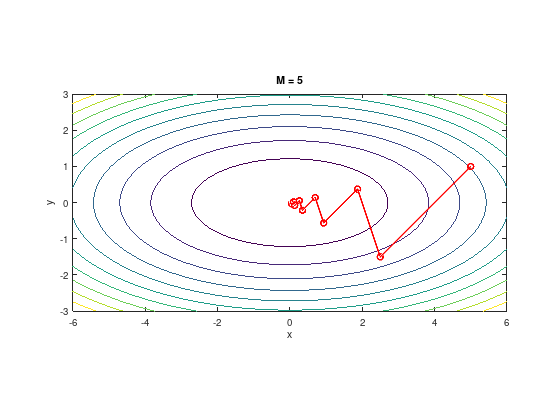

In [34]:
for M = [1, 5]
  figure();
  f = @(x,y) (x.^2 + M * y.^2) / 2;
  [x, y] = meshgrid (linspace (-6, 6, 40), ...
                     linspace (-3, 3, 40));
  contour (x, y, f(x,y));
  hold on;

  f = @(x) (x(1,:).^2 + M * x(2,:).^2) / 2;
  df = @(x) [x(1); M * x(2)];

  N = 10;
  x = zeros (2, N);
  x(:,1) = [5; 1];
  for k = 1:(N - 1)
    d = df(x(:,k));
    alpha = armijo_rule (f, x(:,k), d, -d);
    x(:,k + 1) = x(:,k) - alpha * d;
  end
  plot3 (x(1,:), x(2,:), f(x), 'ro-', 'LineWidth', 2);
  axis equal;
  title (['M = ', num2str(M)]);
  xlabel ('x');
  ylabel ('y');
end

Fast convergence, if $M$ close to 1.

Slow zig-zagging, if $M \gg 1$ or $M \ll 1$.

## Choices of stopping criteria

As important as good convergence towards the minimal point,
is to decide when to stop the optimization algorithm.

In literature there is a huge choice of stopping criteria,
just to list a few:

1. $\quad f(x^{k-1}) - f(x^{k}) \quad \leq \quad \text{TOL} (1 + \lvert f(x^{k}) \rvert )$

2. $\quad \lVert x^{k-1} - x^{k} \rVert \quad \leq \quad \text{TOL} (1 + \lVert x^{k} \rVert )$

3. $\quad \lVert \nabla f(x^{k}) \rVert \quad \leq \quad \text{TOL} (1 + \lvert f(x^{k}) \rvert )$

4. $\quad \lVert \nabla f(x^{k}) \rVert \quad \leq \quad$ machine precision

5. $\quad k \quad \geq \quad k_{\max}$

Criteria 1 to 3 monitor the progress of the algorithm,
while criteria 4 and 5 can be regarded as "emergency breaks".
It is useful to implement criteria like 4 and 5
to avoid **infinite loops** or to stop stuck algorihm runs.

However, it often depends on the given problem
which other stopping critieria are useful.
For example,
if the objective function is expensive to evaluate,
"cheap" stopping criteria which do not cause computational overhead
or are computed by the algorithms anyways might be preferable.

### Newton's method

A more sophisticated choice for the decent direction $d^{k}$
can be obtained from the quadratic Taylor approximation.

Like in the example from the introduction
this is a quadratic unconstrained problem
and it has a unique global minimum,
if the Hessian matrix is positive definite.

Thus deriving the quadratic Taylor approximation to $d^{k}$
and choosing without loss of generality $\alpha^{k} = 1$,
one obtains for the first order necessary condition

$$
\nabla \tilde{f}(x^{k} + d^{k}) := \nabla f(x^{k}) + \nabla^{2} f(x^{k}) d^{k} = 0.
$$

Finally, the decent direction $d^{k}$ is the solution of the following
linear system of equations:

$$
\nabla^{2} f(x^{k}) d^{k} = -\nabla f(x^{k}).
$$

:::{note}

The repetitive application of this method is called **Newton's method**:

$$
x^{k + 1} = x^{k} - \alpha^{k} (\nabla^{2} f(x^{k}))^{-1} \nabla f(x^{k}), \quad k = 0, 1, \ldots
$$

:::

**TODO: Convergence**

## Further gradient method approaches

Other gradient methods follow in principal the form

$$
x^{k + 1} = x^{k} - \alpha^{k} D^{k} \nabla f(x^{k}), \quad k = 0, 1, \ldots,
$$

where $D^{k} \succ 0$ is a symmetric positive definite matrix.

For example:

- **Diagonally scaled steepest descent**

  $D^{k}$ is a diagonal appoximation to $(\nabla^{2} f(x^{k}))^{-1}$

- **Modified Newton's method**

  $$
  D^{k} = (\nabla^{2} f(x^{0}))^{-1}, \quad k = 0, 1, \ldots
  $$

- **Discretized Newton's method**

  $$
  D^{k} = (H(x^{k}))^{-1}, \quad k = 0, 1, \ldots$,
  $$
  
  where $H(x^{k})$ is a finite difference based approximation of $\nabla^{2} f(x^{k})$.

  For example the **forward-** and **central finite difference** formulas:
  
  $$
  \frac{\partial f(x^{k})}{\partial x_{i}} \approx \frac{1}{h}
    \left( f(x^{k} + he_{i}) - f(x^{k}) \right),
  $$
  
  $$
  \frac{\partial f(x^{k})}{\partial x_{i}} \approx \frac{1}{2h}
    \left( f(x^{k} + he_{i}) - f(x^{k} - he_{i}) \right),
  $$
  
  where $e_{i}$ is the $i$-th unit vector and $h$ an approbiate small quantity
  taller than the machine precision.

- **Quasi Newton Methods**